In [80]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import svm

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [81]:
bin_df = pd.read_pickle('./bin_df.pkl')

In [82]:
X = bin_df['string_tokens']
y = bin_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y)

In [138]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

In [139]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect, y_train)

KNeighborsClassifier()

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


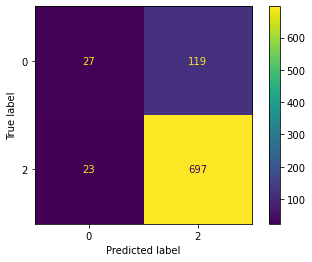

In [140]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)

In [141]:
rfc = RandomForestClassifier()

rfc.fit(X_train_vect, y_train)

RandomForestClassifier()

In [142]:
y_preds = rfc.predict(X_test_vect)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


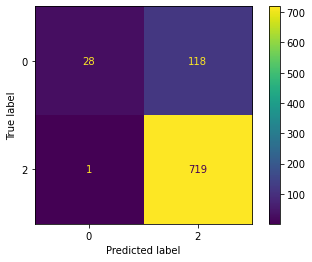

In [143]:
plot_confusion_matrix(rfc, X_test_vect, y_test)

## Support Vector Classifier

In [167]:
svcl = svm.SVC()

svcl.fit(X_train_vect, y_train)

y_pred_sv = svcl.predict(X_test_vect)

print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.96      0.18      0.30       146
           2       0.86      1.00      0.92       720

    accuracy                           0.86       866
   macro avg       0.91      0.59      0.61       866
weighted avg       0.87      0.86      0.82       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


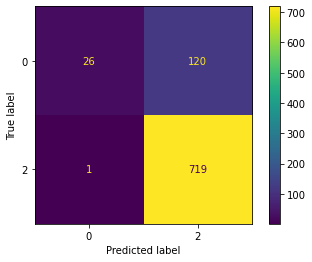

In [145]:
plot_confusion_matrix(svcl, X_test_vect, y_test)

In [146]:
print(classification_report(y_pred_sv, y_test))

              precision    recall  f1-score   support

           0       0.18      0.96      0.30        27
           2       1.00      0.86      0.92       839

    accuracy                           0.86       866
   macro avg       0.59      0.91      0.61       866
weighted avg       0.97      0.86      0.90       866



## Complementary Naive Bayes Classifier

In [168]:
cnb = ComplementNB()

cnb.fit(X_train_vect, y_train)

y_preds_cnb = cnb.predict(X_test_vect)

print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.20      0.88      0.32        33
           2       0.99      0.86      0.92       833

    accuracy                           0.86       866
   macro avg       0.60      0.87      0.62       866
weighted avg       0.96      0.86      0.90       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


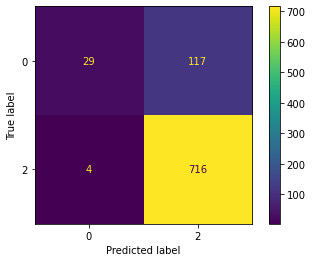

In [169]:
plot_confusion_matrix(cnb, X_test_vect, y_test)

## Gradient Boost Classifier

In [158]:
gboost = GradientBoostingClassifier()

gboost.fit(X_train_vect, y_train)

y_preds_gboost = gboost.predict(X_test_vect)

print(classification_report(y_test, y_preds_gboost))

              precision    recall  f1-score   support

           0       0.78      0.14      0.24       146
           2       0.85      0.99      0.92       720

    accuracy                           0.85       866
   macro avg       0.81      0.57      0.58       866
weighted avg       0.84      0.85      0.80       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


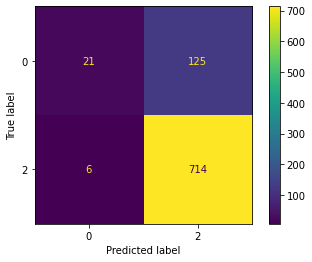

In [159]:
plot_confusion_matrix(gboost, X_test_vect, y_test)

# Rinse, SMOTE, Repeat

In [160]:
oversample = SMOTE()
X_train_vect_smote, y_smote = oversample.fit_resample(X_train_vect, y_train)

## Complementary Naive Bayes Classifier (w/ SMOTE)

In [163]:
cnb = ComplementNB()

cnb.fit(X_train_vect_smote, y_smote)

y_preds_cnb = cnb.predict(X_test_vect)

print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.71      0.49      0.58       211
           2       0.85      0.94      0.89       655

    accuracy                           0.83       866
   macro avg       0.78      0.71      0.74       866
weighted avg       0.82      0.83      0.82       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


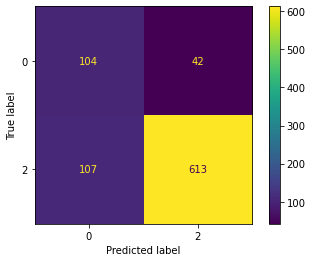

In [164]:
plot_confusion_matrix(cnb, X_test_vect, y_test)

## Gradient Boosting Classifier (w/ SMOTE)

In [165]:
gboost = GradientBoostingClassifier()

gboost.fit(X_train_vect_smote, y_smote)

y_preds_gboost = gboost.predict(X_test_vect)

print(classification_report(y_test, y_preds_gboost))

              precision    recall  f1-score   support

           0       0.44      0.29      0.35       146
           2       0.87      0.92      0.89       720

    accuracy                           0.82       866
   macro avg       0.65      0.61      0.62       866
weighted avg       0.79      0.82      0.80       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


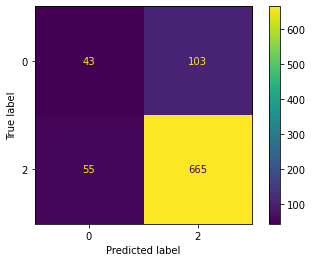

In [166]:
plot_confusion_matrix(gboost, X_test_vect, y_test)

## Support Vector Classifier (w/ SMOTE)

In [170]:
svcl = svm.SVC()

svcl.fit(X_train_vect_smote, y_smote)

y_pred_sv = svcl.predict(X_test_vect)

print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.94      0.21      0.34       146
           2       0.86      1.00      0.92       720

    accuracy                           0.86       866
   macro avg       0.90      0.60      0.63       866
weighted avg       0.87      0.86      0.83       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


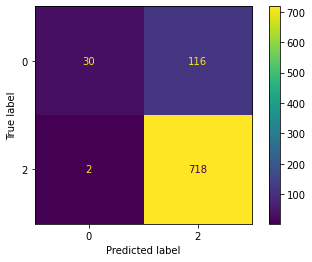

In [171]:
plot_confusion_matrix(svcl, X_test_vect, y_test)